## Problem Statement

Provided with a dataset containing various data points, each described by a set of features. Your task is to apply unsupervised
learning techniques to cluster these data points into 'n' distinct clusters. Additionally, you need to identify the most important features and
their corresponding values that contribute significantly to the grouping of data points within these clusters.

## Objective:

1. Clustering: Implement an unsupervised learning algorithm to partition the data points into 'n' clusters. You should select an appropriate
clustering algorithm based on the characteristics of the dataset and the problem requirements.
2. Feature Importance: Identify the most important features that influence the formation of clusters. Determine the relevance and
significance of each feature in grouping data points together. This analysis will help you understand which features are driving the cluster
assignments.
3. Feature Values: Determine the specific values or ranges of values for the identified important features that are associated with each
cluster. In other words, find the feature-value combinations that differentiate one cluster from another.

# Index


##Solution

##1. Data Preprocessing:
Handling of missing values using **mean and mode**.

Standardidation of features using **StandardScaler**.

Encoded categorical variables using **LabelEncoder**.
##2. Clustering:
Choose an appropriate clustering algorithm (**K-means clustering**).

Determined the **optimal number of clusters which is '2' based on both elbow method and silhouette score.**

Applid the chosen algorithm to cluster the data points into '2' clusters.

##3. Evaluation:

Evaluated the quality of the clustering results using **Silhouette score,  Davies-Bouldin index, Calinski_Harabasz_score**.
##4. Clustering:
Employed techniques such as dimensionality reduction method PCA and K-means inbuilt method to perform clustering.

Determined the relevance and contribution of each feature to the cluster assignments by employing **RFC**.

##5. Insights:

Tabulation of the contribution of the original features in forming the pca components.

Created a bar gaph that represents the influencing feature-value distributions in each cluster.

For each identified important feature, analyse its values or value ranges that are prevalent in each cluster in table form



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Importing Data

In [2]:
data=pd.read_csv('METABRIC_RNA_Mutation.csv')

#Data Exploration

In [3]:
data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(1904, 693)

In [5]:
data.describe(include='all')

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
count,1904.000000,1904.000000,1882,1904,1889,1850,1904.000000,1904,1904.000000,1874,...,1904,1904,1904,1904,1904,1904.0,1904,1904.0,1904,1904.0
unique,NaN,NaN,2,2,6,3,NaN,7,NaN,2,...,5,5,5,4,4,4.0,3,4.0,3,3.0
top,NaN,NaN,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NaN,LumA,NaN,Positve,...,0,0,0,0,0,0.0,0,0.0,0,0.0
freq,NaN,NaN,1127,1903,1500,939,NaN,679,NaN,1445,...,1900,1900,1900,1901,1901,1024.0,1902,1024.0,1902,1024.0
mean,3921.982143,61.087054,NaN,NaN,NaN,NaN,0.207983,NaN,2.643908,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2358.478332,12.978711,NaN,NaN,NaN,NaN,0.405971,NaN,1.228615,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,21.930000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,896.500000,51.375000,NaN,NaN,NaN,NaN,0.000000,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4730.500000,61.770000,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5536.250000,70.592500,NaN,NaN,NaN,NaN,0.000000,NaN,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#separating categorical and numerical value based columns
cat_cols=data.describe(include='object').columns.tolist()
num_cols=data.describe(exclude='object').columns.tolist()

#converting object datatypes into categorical columns.
for i in cat_cols:
  data[i]=data[i].astype('category')

# Data Preprocessing

## Missing Values

In [7]:
#identifying and noting down the cols with missing values
missing_cat=[]
for i in cat_cols:
  if(data[i].isna().sum()== 0):
    pass
  else:
    missing_cat.append(i)

missing_num=[]
for i in num_cols:
  if(data[i].isna().sum()== 0):
    pass
  else:
    missing_num.append(i)

#viewing the % of missing values in the columns
print((data[missing_cat].isna().sum())/data.shape[0])
print((data[missing_num].isna().sum())/data.shape[0])

#we will drop the columns have more than 10% missing values
data1=data.drop(['tumor_stage'],axis=1)


#handling missing values with mode and mean for cat and num cols respectively
for i in missing_cat:
  if(i in data1.columns.tolist()):
    x=data1[i].mode().tolist()
    data1[i]=data1[i].fillna(x[0])

for i in missing_num:
  if(i in data1.columns.tolist()):
    data1[i]=data1[i].fillna(data1[i].mean())

#redefining cat and num cols after dropping the ones with excess % of missing data
new_cat=data1.describe(include='category').columns.tolist()
new_num=data1.describe(exclude='category').columns.tolist()

type_of_breast_surgery            0.011555
cancer_type_detailed              0.007878
cellularity                       0.028361
er_status_measured_by_ihc         0.015756
tumor_other_histologic_subtype    0.007878
primary_tumor_laterality          0.055672
oncotree_code                     0.007878
3-gene_classifier_subtype         0.107143
death_from_cancer                 0.000525
dtype: float64
neoplasm_histologic_grade    0.037815
mutation_count               0.023634
tumor_size                   0.010504
tumor_stage                  0.263130
dtype: float64


In [8]:
data1.isna().sum().sum()

0

## Encoding Categorical Variables

In [9]:
encoder=LabelEncoder()

#encoding mixture of numerical and text values
for i in new_cat:
  try:
    data1[i]=encoder.fit_transform(data1[i])
  except TypeError:
    data1[i]=data1[i].replace(0,'Zero')
    data1[i]=encoder.fit_transform(data1[i])

## Standardization
To ensure all features have a similar scale, which can be important for algorithms that rely on distance calculations(K-Means clustering uses distance calculations)

In [10]:
data.describe(exclude='category')

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


In [11]:
scaler=StandardScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(data1[new_num]),columns=new_num)
print('Scaled data shape:',scaled_data.shape)
new_data=pd.concat((data1[new_cat],scaled_data),axis=1)
print('New data shape:',new_data.shape)

Scaled data shape: (1904, 502)
New data shape: (1904, 692)


# Clustering

**To find the ideal number of clusters using elbow and silhoutte score method**

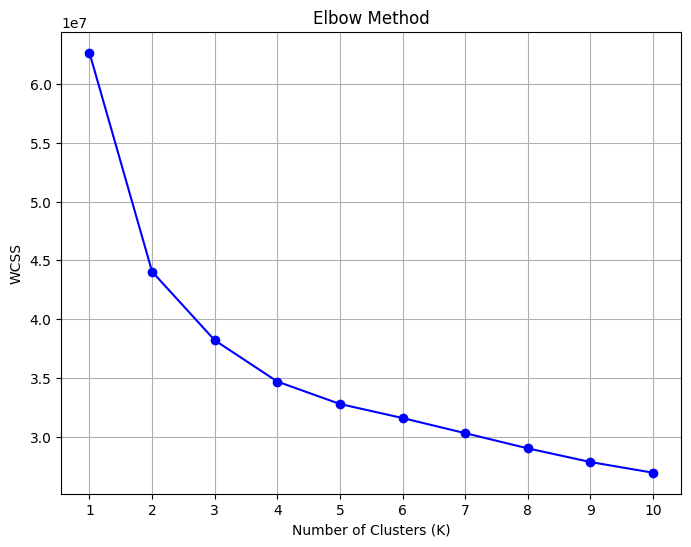

In [12]:
X=new_data.copy()
X.columns = X.columns.astype(str)

#Elbow method
# Calculate WCSS for a range of K values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

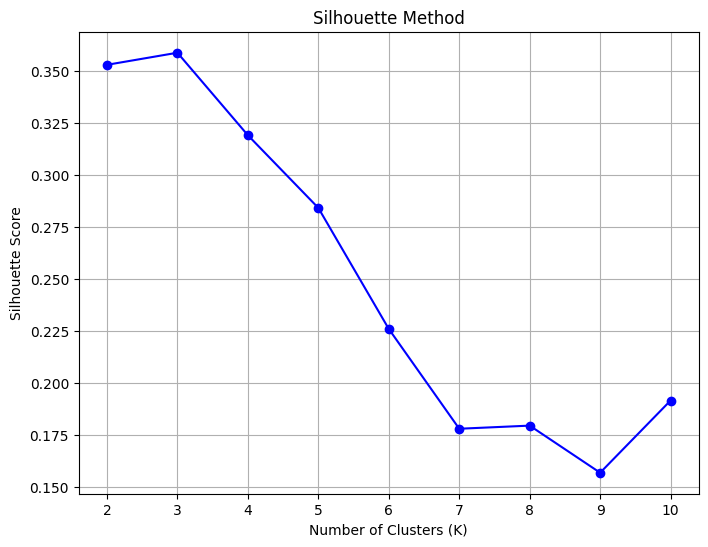

In [13]:
#silhoutte scores method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Silhouette Method curve
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

**From both the graphs we can conclude that the ideal number of clusters is 2 as per the methods.**

## Clustering the dimensionally reduced dataset through PCA, evaluating the results and obtaining the important features and their corresponding values

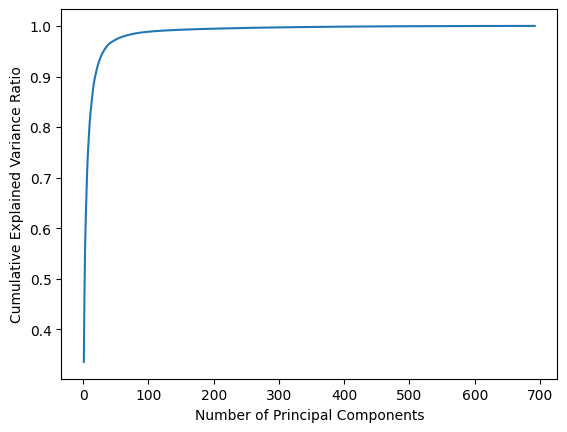

Explained Variance Ratios:
[0.33570044 0.13648734 0.09348513 0.05628623 0.04368038 0.04273306
 0.03382634 0.02433429 0.02150766 0.02042054 0.01630658 0.01331658
 0.01218076 0.01183275 0.01144311 0.01010691 0.00731728 0.00706275
 0.0060324  0.00583681 0.00543491 0.00478866 0.00452593 0.00389692
 0.00377669 0.00345354 0.00334813 0.002979   0.00259216 0.00243911]
Explained variance ratio's cumulative sum
[0.33570044 0.47218778 0.56567291 0.62195914 0.66563953 0.70837259
 0.74219893 0.76653322 0.78804088 0.80846142 0.824768   0.83808458
 0.85026534 0.86209809 0.8735412  0.8836481  0.89096538 0.89802813
 0.90406053 0.90989734 0.91533226 0.92012092 0.92464685 0.92854376
 0.93232045 0.93577399 0.93912212 0.94210112 0.94469328 0.9471324 ]


In [14]:
pca = PCA()
X=new_data.copy()
X.columns = X.columns.astype(str)
pca.fit(X)  # Fit PCA on your data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

print("Explained Variance Ratios:")
print(explained_variance_ratio[0:30])
print("Explained variance ratio's cumulative sum")
print(cumulative_variance_ratio[0:30])

**After the first 20components the explainability gradient drastically. Hence we will go ahead with the first 20components.**

In [15]:
pca=PCA(n_components=20)
X_pca = pca.fit_transform(X)


**K-Means clustering**
Is useful to obtain important features post clustering.

 **davies_bouldin_score:** a lower Davies-Bouldin Index suggests that the clusters are well-separated and distinct

 **silhouette_score:** A higher Silhouette Score indicates that the data points are well-separated into clusters.

**calinski-Harabasz_score:** higher values indicating better separation between clusters

In [19]:
# Performing K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0,max_iter=1000)
labels = kmeans.fit_predict(X_pca)

# Evaluating the clustering results
silhouette_avg = silhouette_score(X, labels)
db_index = davies_bouldin_score(X, labels)
ch_index = calinski_harabasz_score(X, labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")
print(f"Calinski-Harabasz Index: {ch_index}")

Silhouette Score: 0.3588823387644061
Davies-Bouldin Index: 1.3191358262520576
Calinski-Harabasz Index: 608.3665255110346


In [20]:
#obtaining the features
df=pd.DataFrame(X_pca)
df['ClusterLabel'] = kmeans.fit_predict(df)

# Get the centroids (cluster centers)
centroids = kmeans.cluster_centers_

# Identify important features based on centroids
important_features = np.argsort(np.abs(centroids), axis=1)[:,-10:]  # Select the top 10 important components for each cluster

print("Important Features for Each Cluster:")
print(important_features)

Important Features for Each Cluster:
[[ 5 16  4 15 10  8  3  0  2  1]
 [ 9  3 10  4  6  5  7  2  1  0]
 [17  9  6  5  7  8  3  2  1  0]]


In [21]:
#obtaining the original features from the dimensionally reduced components and their weightage in the process.
loadings = pca.components_
# Get the original feature names (assuming your data is in a DataFrame)
original_feature_names = list(pd.DataFrame(X, columns=["Feature_" + str(i) for i in range(691)]))
orig_cols=new_data.columns.tolist()

# Print the loadings for the first PC with corresponding feature names
def feature_names(loadings,original_feature_names,component_name):
  feat={'feature_name':[],'weightage':[]}
  loadings_for_first_pc = loadings
  loading_with_names = list(zip(original_feature_names, loadings_for_first_pc))
  for feature_name, loading in loading_with_names:
    feat['feature_name'].append(feature_name)
    feat['weightage'].append(loading)
    values=sorted(feat['weightage'],reverse=True)[0:3]
    indices={'feature_name':[],'weightage':[],'component_name':[]}
    for i in values:
      if 'weightage' in feat:
        x = [index for index, value in enumerate(feat['weightage']) if value == i]
      indices['feature_name'].append(orig_cols[x[0]])
      indices['weightage'].append(i)
      indices['component_name'].append(component_name)
  return indices

f_names=pd.DataFrame()
for i in important_features[0]:
  f_names=pd.concat((f_names,pd.DataFrame(feature_names(loadings[i],original_feature_names,i))))

In [22]:
x_cols=new_data.columns.tolist()
x_new=new_data.copy()
x_new['ClusterLabel']=df['ClusterLabel']

feat_contribution={'Feature_Name':[],'%_of_Influence_in_cluster_formation':[]}
data=x_new.drop(['ClusterLabel'],axis=1)
labels=x_new['ClusterLabel']
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(data,labels)  # Fit the model with cluster labels as targets
feature_importance = model.feature_importances_.tolist()
values=sorted(feature_importance,reverse=True)[0:10]
for i in values:
  x=[index for index, value in enumerate(feature_importance) if value == i]
  feat_contribution['Feature_Name'].append(x_cols[x[0]])
  # feat_contribution['index'].append(x[0])
  feat_contribution['%_of_Influence_in_cluster_formation'].append(i*100)

# Insights Obtained

## Top 3 original features that have the major influence on the formation of pca components(distribution is component wise)

**1. feature_name:** Name of the feature as per the dataframe.

**2. weightage:** Weightage of the feature in the formation of the component.

**3. component_name:** The name of the pca component(0-4)


In [23]:
f_names

,feature_name,weightage,component_name
0,pik3ca_mut,0.719872,5
1,syne1_mut,0.518026,5
2,map3k1_mut,0.321703,5
0,herc2_mut,0.711750,16
1,akap9_mut,0.556025,16
2,tg_mut,0.244490,16
0,syne1_mut,0.843752,4
1,kmt2c_mut,0.166811,4
2,dnah11_mut,0.119487,4
0,dnah5_mut,0.901498,15


## The below table shows the importance of the features in the formation of the clusters(in %)

In [24]:
pd.DataFrame(feat_contribution)

,Feature_Name,%_of_Influence_in_cluster_formation
0,tp53_mut,13.406653
1,muc16_mut,8.024650
2,bcl2,1.690352
3,chek1,1.304575
4,aph1b,1.281970
5,er_status,1.096085
6,srd5a1,0.718228
7,e2f3,0.691974
8,gata3,0.615171
9,chek2,0.580421


## The below visualizations show the cluster-wise distribution of values(frequency-value pair) belonging to the top10 features that have influenced the formation of clusters.

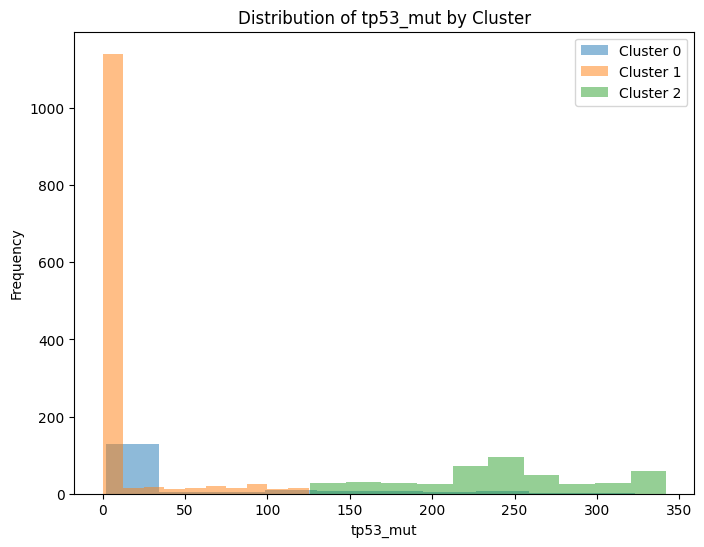

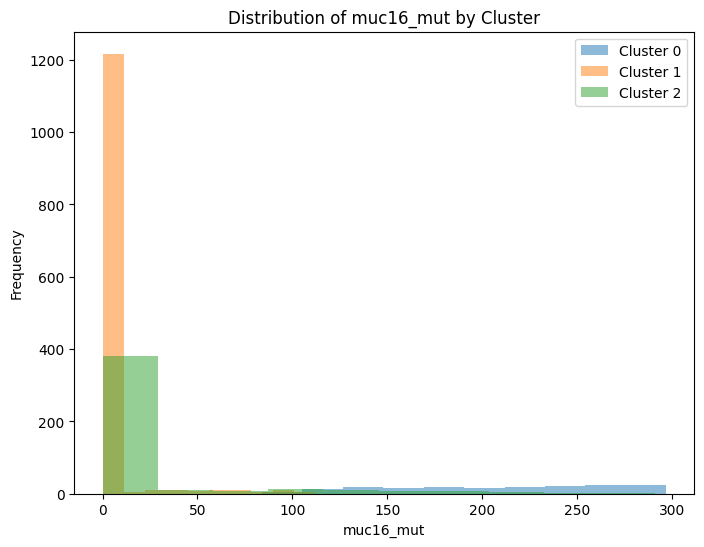

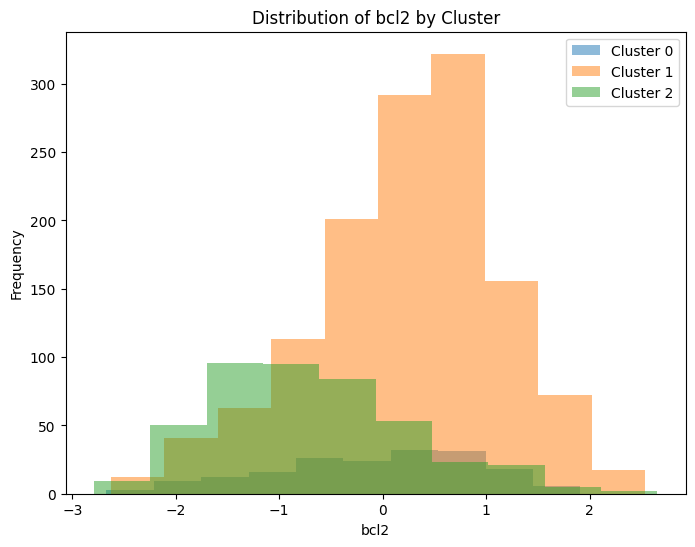

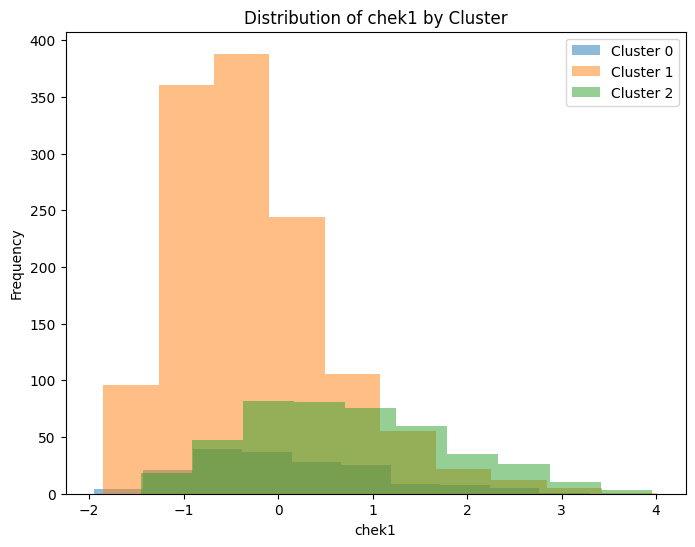

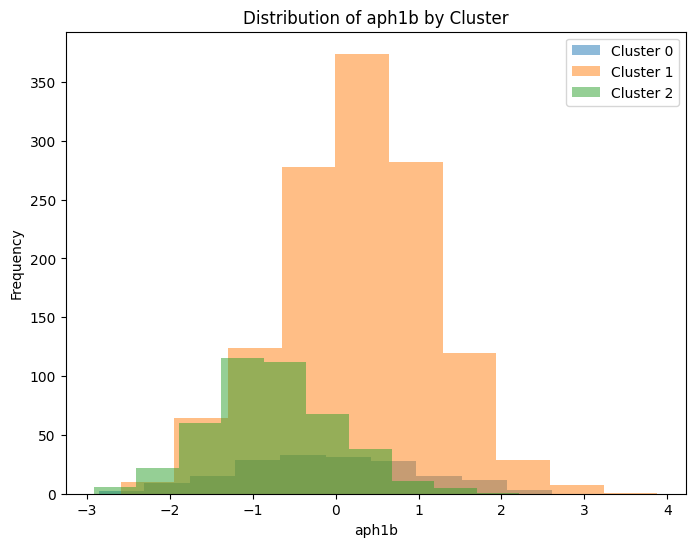

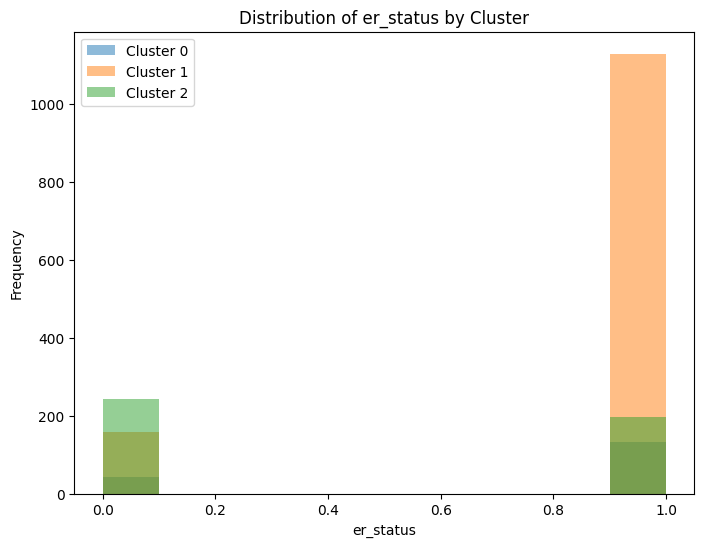

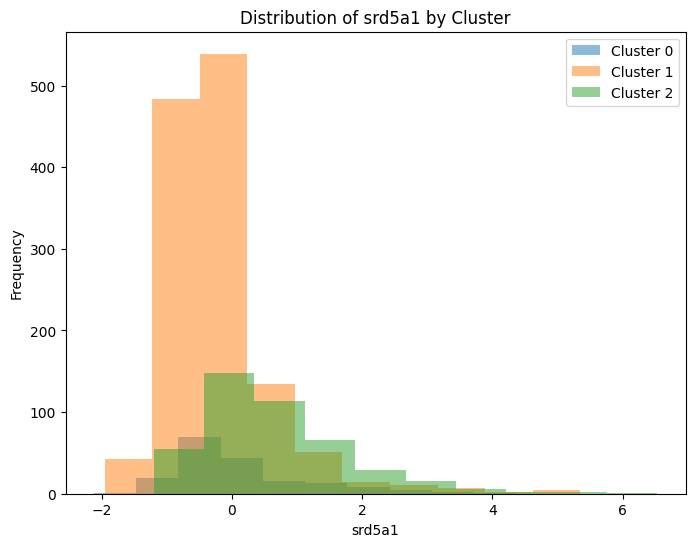

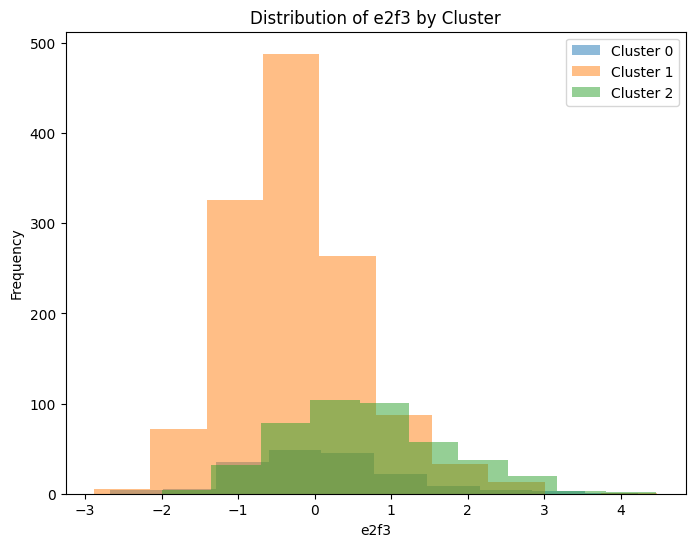

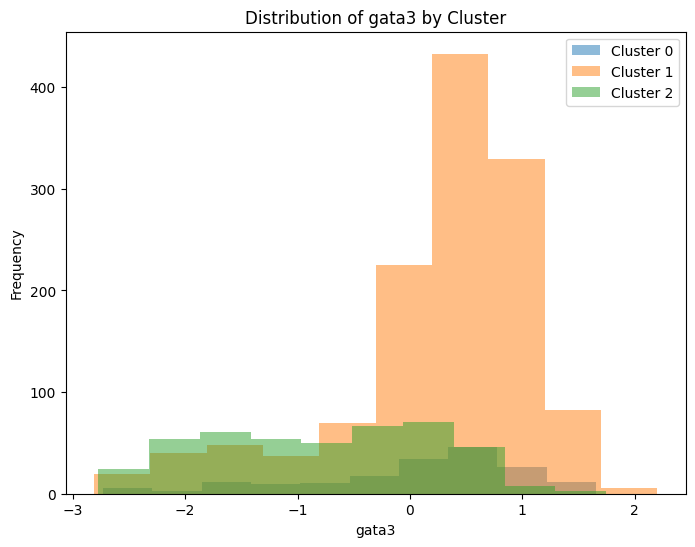

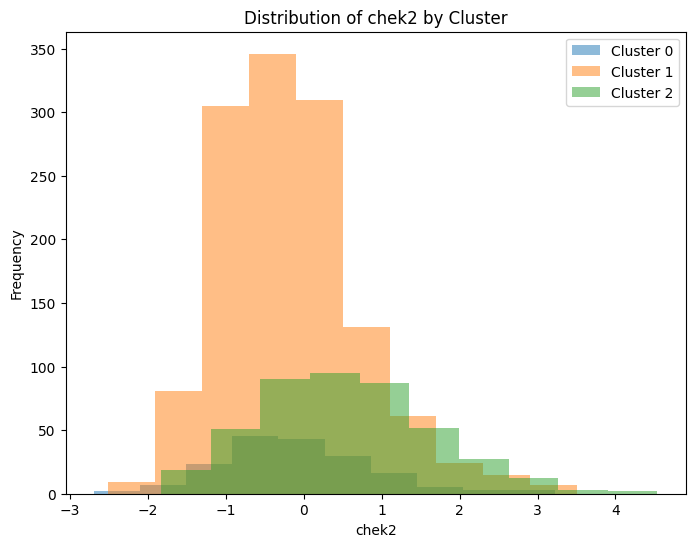

In [26]:
#processing the obtained indices to extract the original feature names from the dataset and their distribution cluster wise.

important_features=feat_contribution['Feature_Name']

# Group data by cluster
cluster_label_data=new_data.copy()
cluster_label_data['ClusterLabel']=df['ClusterLabel']
cluster_groups = cluster_label_data.groupby('ClusterLabel')

# insights0,insights1,inisghts2=pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
# j=0
# for feature in important_features:
#   for label,group in cluster_groups:
#     j+=1
#     if(j%2==0):
#       insights0=pd.concat((insights0,group[feature]),axis=1)
#     elif(j%3==0):
#       insights1=pd.concat((insights1,group[feature]),axis=1)

# Analyze feature distributions for each cluster
for feature in important_features:
    # Visualize feature distributions
    plt.figure(figsize=(8, 6))
    for label, group in cluster_groups:
        plt.hist(group[feature], bins=10, alpha=0.5, label=f'Cluster {label}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

In [34]:
pd.DataFrame(cluster_label_data.groupby('ClusterLabel'))

,0,1
0,0,type_of_breast_surgery cancer_type can...
1,1,type_of_breast_surgery cancer_type can...
2,2,type_of_breast_surgery cancer_type can...


## The below tables give the statistical description of the values from the top10 features which have influenced the formation of clusters.

In [28]:
insights0,insights1,insights2=pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
j=0
for feature in important_features:
  for label,group in cluster_groups:
    j+=1
    if(j%2==0):
      insights1=pd.concat((insights1,group[feature]),axis=1)
    elif(j%3==0):
      insights2=pd.concat((insights2,group[feature]),axis=1)
    else:
      insights0=pd.concat((insights0,group[feature]),axis=1)

In [32]:
cluster_groups

In [29]:
#cluster_label=0
insights0.describe()

,tp53_mut,muc16_mut,bcl2,chek1,aph1b,er_status,srd5a1,e2f3,gata3,chek2
count,177.000000,1289.000000,177.000000,1289.000000,177.000000,1289.000000,177.000000,1289.000000,177.000000,1289.000000
mean,45.310734,3.281614,-0.068487,-0.263748,-0.085432,0.876649,0.088949,-0.248889,0.031554,-0.170871
std,75.510005,14.846648,0.998443,0.842562,1.066538,0.328968,1.003140,0.848130,0.992914,0.891159
min,2.000000,0.000000,-2.670204,-1.852003,-2.854401,0.000000,-2.120800,-2.885000,-2.730298,-2.505101
25%,2.000000,0.000000,-0.641900,-0.845201,-0.788700,1.000000,-0.533100,-0.800200,-0.453799,-0.830700
50%,2.000000,0.000000,0.029801,-0.398700,-0.103899,1.000000,-0.177500,-0.323100,0.264500,-0.244600
75%,64.000000,0.000000,0.748202,0.133901,0.676401,1.000000,0.421299,0.197601,0.734100,0.333900
max,323.000000,112.000000,1.911104,4.015408,2.611703,1.000000,4.367898,4.480201,1.655600,3.508301


In [30]:
#cluster_label=1
insights1.describe()

,tp53_mut,muc16_mut,muc16_mut,bcl2,chek1,chek1,aph1b,er_status,er_status,srd5a1,e2f3,e2f3,gata3,chek2,chek2
count,1289.000000,177.000000,438.000000,1289.000000,177.000000,438.000000,1289.000000,177.000000,438.000000,1289.000000,177.000000,438.000000,1289.000000,177.000000,438.000000
mean,9.831652,206.514124,16.808219,0.246009,0.091531,0.739201,0.267365,0.751412,0.447489,-0.238359,0.126807,0.681218,0.262116,-0.079770,0.535096
std,24.172524,57.501789,47.122215,0.900798,0.982231,1.058207,0.919070,0.433420,0.497803,0.824887,1.064124,1.061348,0.856235,0.996889,1.113713
min,0.000000,84.000000,0.000000,-2.625804,-1.949803,-1.447602,-2.593301,0.000000,0.000000,-1.950500,-2.671300,-1.992600,-2.812598,-2.688701,-1.826601
25%,2.000000,160.000000,0.000000,-0.242800,-0.639900,-0.084099,-0.317400,1.000000,0.000000,-0.723900,-0.594100,-0.103149,-0.014699,-0.690800,-0.348125
50%,2.000000,211.000000,0.000000,0.317601,-0.053799,0.678202,0.328601,1.000000,0.000000,-0.388300,-0.006299,0.595851,0.468000,-0.158500,0.493000
75%,2.000000,257.000000,0.000000,0.859302,0.715002,1.380228,0.882001,1.000000,1.000000,0.014100,0.653101,1.310926,0.806300,0.498200,1.230000
max,125.000000,297.000000,291.000000,2.534905,3.290407,3.952808,3.881904,1.000000,1.000000,5.345998,4.226701,4.458301,2.202800,3.230501,4.538202


In [31]:
insights2.describe()

,tp53_mut,bcl2,aph1b,srd5a1,gata3
count,438.000000,438.000000,438.000000,438.000000,438.000000
mean,242.118721,-0.696310,-0.752312,0.665527,-0.784138
std,55.817614,0.947370,0.792570,1.153892,0.989826
min,126.000000,-2.791904,-2.917802,-1.201500,-2.772898
25%,213.000000,-1.404102,-1.292350,-0.178325,-1.633374
50%,237.000000,-0.842751,-0.783400,0.421749,-0.729049
75%,280.000000,-0.127225,-0.279675,1.278724,0.030726
max,342.000000,2.656105,2.212302,6.534898,1.745900


# Conclusion

The objective of the case study that is to cluster the data and to identify the important features along with their contribution to the clustering is achieved.